# Introduction
Looking for patterns in box office trends; perhaps by genre and/or director.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
movies = pd.read_csv("Bollywoodboxoffice_raw.csv")
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   movie_name                         130 non-null    object
 1   movie_url                          130 non-null    object
 2   movie_opening                      130 non-null    object
 3   movie_weekend                      130 non-null    object
 4   movie_first_week                   130 non-null    object
 5   movie_total_collection             130 non-null    object
 6   movie_worlwide                     130 non-null    object
 7   movie_genre                        129 non-null    object
 8   movie_release_date & movie length  130 non-null    object
 9   movie_banner                       130 non-null    object
 10  movie_director                     130 non-null    object
 11  movie_director_url                 130 non-null    object
 12  movie_pr

In [3]:
movies.head()

,movie_name,movie_url,movie_opening,movie_weekend,movie_first_week,movie_total_collection,movie_worlwide,movie_genre,movie_release_date & movie length,movie_banner,movie_director,movie_director_url,movie_producer,movie_moviedetails,movie_actors
0,Angrezi Medium,https://www.bollywoodmdb.com/movies/hindi-medi...,: 4.03 cr,: 9.03 cr,: 9.36 cr,: 9.36 cr,: 13.50 cr,"Drama, Comedy","13 March, 2020 | 2 hrs 25 mins","Banner : Maddock Films, Jio Studios",Homi Adajania,https://www.bollywoodmdb.com/celebrities/homi-...,"Producer : Dinesh Vijan , Jyoti Deshpande",When his daughter decides to further her studi...,"Star : Irrfan Khan , Radhika Madan, Kareena Ka..."
1,Baaghi 3,https://www.bollywoodmdb.com/movies/baaghi-3/1...,: 17.50 cr,: 53.83 cr,: 90.67 cr,: 93.37 cr,: 137 cr,Action,"06 March, 2020 | 2 hrs 27 mins","Banner : Nadiadwala Grandson Entertainment, Fo...",Ahmed Khan,https://www.bollywoodmdb.com/celebrities/ahmed...,Producer : Sajid Nadiadwala,A man embarks on a bloody rampage to save his ...,"Star : Tiger Shroff , Shraddha Kapoor, Riteish..."
2,Thappad,https://www.bollywoodmdb.com/movies/thappad/16643,: 3.07 cr,: 14.66 cr,: 22.79 cr,: 30.61 cr,: 44.50 cr,"Drama, Social","28 February, 2020 | 2 hrs 22 mins","Banner : Benaras Media Works, T-Series Super C...",Anubhav Sinha,https://www.bollywoodmdb.com/celebrities/anubh...,"Producer : Bhushan Kumar , Krishan Kumar, Anub...",Thappad is a story of Amrita whose seemingly p...,"Star : Taapsee Pannu , Pavail Gulati, Dia Mirza"
3,Shubh Mangal Zyada Saavdhan,https://www.bollywoodmdb.com/movies/shubh-mang...,: 9.55 cr,: 32.66 cr,: 44.84 cr,: 62.78 cr,: 86.39 cr,"Comedy, Romance","21 February, 2020 | 2 hrs","Banner : Colour Yellow Productions Pvt Ltd, T-...",Hitesh Kewalya,https://www.bollywoodmdb.com/celebrities/hites...,"Producer : Aanand L Rai , Himanshu Sharma, Bhu...",The road to achieving a happy ending is a litt...,"Star : Ayushman Khurana , Jitendra Kumar, Gajr..."
4,Bhoot: Part One - The Haunted Ship,https://www.bollywoodmdb.com/movies/bhoot-part...,: 5.10 cr,: 16.36 cr,: 24.18 cr,: 31.97 cr,: 40.94 cr,Horror,"21 February, 2020 | 1 hrs 57 mins","Banner : Dharma Productions, Zee Studios",Bhanu Pratap Singh,https://www.bollywoodmdb.com/celebrities/bhanu...,"Producer : Hiroo Johar , Karan Johar, Apoorva ...",A couple is trapped on an abandoned ship lying...,"Star : Vicky Kaushal , Bhumi Pednekar, Ashutos..."


Looks like the data needs to be cleaned somewhat.

I. The url columns will be dropped because they don't affect the analysis.

II. Some of the columns need to be split into multiple columns.

III. Columns should be renamed for simplicity

IV. Some of the text needs to be processed.

In [4]:
movies.drop(["movie_url", "movie_director_url"], axis = 1, inplace = True)

In [5]:
movies[["movie_release_date", "movie_runtime"]] = movies["movie_release_date & movie length"].str.split("|", expand = True)
movies.drop("movie_release_date & movie length", axis = 1, inplace = True)
movies.columns = movies.columns.str.replace("^movie_", '')
movies.head()

,name,opening,weekend,first_week,total_collection,worlwide,genre,banner,director,producer,moviedetails,actors,release_date,runtime
0,Angrezi Medium,: 4.03 cr,: 9.03 cr,: 9.36 cr,: 9.36 cr,: 13.50 cr,"Drama, Comedy","Banner : Maddock Films, Jio Studios",Homi Adajania,"Producer : Dinesh Vijan , Jyoti Deshpande",When his daughter decides to further her studi...,"Star : Irrfan Khan , Radhika Madan, Kareena Ka...","13 March, 2020",2 hrs 25 mins
1,Baaghi 3,: 17.50 cr,: 53.83 cr,: 90.67 cr,: 93.37 cr,: 137 cr,Action,"Banner : Nadiadwala Grandson Entertainment, Fo...",Ahmed Khan,Producer : Sajid Nadiadwala,A man embarks on a bloody rampage to save his ...,"Star : Tiger Shroff , Shraddha Kapoor, Riteish...","06 March, 2020",2 hrs 27 mins
2,Thappad,: 3.07 cr,: 14.66 cr,: 22.79 cr,: 30.61 cr,: 44.50 cr,"Drama, Social","Banner : Benaras Media Works, T-Series Super C...",Anubhav Sinha,"Producer : Bhushan Kumar , Krishan Kumar, Anub...",Thappad is a story of Amrita whose seemingly p...,"Star : Taapsee Pannu , Pavail Gulati, Dia Mirza","28 February, 2020",2 hrs 22 mins
3,Shubh Mangal Zyada Saavdhan,: 9.55 cr,: 32.66 cr,: 44.84 cr,: 62.78 cr,: 86.39 cr,"Comedy, Romance","Banner : Colour Yellow Productions Pvt Ltd, T-...",Hitesh Kewalya,"Producer : Aanand L Rai , Himanshu Sharma, Bhu...",The road to achieving a happy ending is a litt...,"Star : Ayushman Khurana , Jitendra Kumar, Gajr...","21 February, 2020",2 hrs
4,Bhoot: Part One - The Haunted Ship,: 5.10 cr,: 16.36 cr,: 24.18 cr,: 31.97 cr,: 40.94 cr,Horror,"Banner : Dharma Productions, Zee Studios",Bhanu Pratap Singh,"Producer : Hiroo Johar , Karan Johar, Apoorva ...",A couple is trapped on an abandoned ship lying...,"Star : Vicky Kaushal , Bhumi Pednekar, Ashutos...","21 February, 2020",1 hrs 57 mins


In [6]:
revenues = ["opening", "weekend", "first_week", "total_collection", "worlwide"]
types = {col: 'float' for col in revenues}

def replacer(x):
    x = x.str.replace("^: ", "")
    x = x.str.replace("cr$", "")
    x = x.str.replace('^---', "0")
    return x.str.replace("\* $", "")

movies[revenues] = movies[revenues].apply(replacer)
movies[revenues] = movies[revenues].astype(types)

movies[revenues].head()

,opening,weekend,first_week,total_collection,worlwide
0,4.03,9.03,9.36,9.36,13.50
1,17.50,53.83,90.67,93.37,137.00
2,3.07,14.66,22.79,30.61,44.50
3,9.55,32.66,44.84,62.78,86.39
4,5.10,16.36,24.18,31.97,40.94


In [7]:
movies[["Date", "Year"]] = movies["release_date"].str.split(",", expand = True)
movies[["Day", "Month"]] = movies["Date"].str.split(" ", expand = True)

movies.drop(["release_date", "Date"], axis = 1, inplace = True)

movies.head()

,name,opening,weekend,first_week,total_collection,worlwide,genre,banner,director,producer,moviedetails,actors,runtime,Year,Day,Month
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy","Banner : Maddock Films, Jio Studios",Homi Adajania,"Producer : Dinesh Vijan , Jyoti Deshpande",When his daughter decides to further her studi...,"Star : Irrfan Khan , Radhika Madan, Kareena Ka...",2 hrs 25 mins,2020,13,March
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,"Banner : Nadiadwala Grandson Entertainment, Fo...",Ahmed Khan,Producer : Sajid Nadiadwala,A man embarks on a bloody rampage to save his ...,"Star : Tiger Shroff , Shraddha Kapoor, Riteish...",2 hrs 27 mins,2020,06,March
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social","Banner : Benaras Media Works, T-Series Super C...",Anubhav Sinha,"Producer : Bhushan Kumar , Krishan Kumar, Anub...",Thappad is a story of Amrita whose seemingly p...,"Star : Taapsee Pannu , Pavail Gulati, Dia Mirza",2 hrs 22 mins,2020,28,February
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance","Banner : Colour Yellow Productions Pvt Ltd, T-...",Hitesh Kewalya,"Producer : Aanand L Rai , Himanshu Sharma, Bhu...",The road to achieving a happy ending is a litt...,"Star : Ayushman Khurana , Jitendra Kumar, Gajr...",2 hrs,2020,21,February
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,"Banner : Dharma Productions, Zee Studios",Bhanu Pratap Singh,"Producer : Hiroo Johar , Karan Johar, Apoorva ...",A couple is trapped on an abandoned ship lying...,"Star : Vicky Kaushal , Bhumi Pednekar, Ashutos...",1 hrs 57 mins,2020,21,February


In [8]:
time = movies["runtime"].str.split()

time = time.apply(lambda x: [int(x1) for x1 in x if x1 != 'hrs' and x1 != 'mins'])

def calc_runtime(x):
    if len(x) == 1:
        return 60 * x[0]
    else:
        return (60 * x[0]) + x[1]

movies["runtime"] = time.apply(calc_runtime)

movies.head()

,name,opening,weekend,first_week,total_collection,worlwide,genre,banner,director,producer,moviedetails,actors,runtime,Year,Day,Month
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy","Banner : Maddock Films, Jio Studios",Homi Adajania,"Producer : Dinesh Vijan , Jyoti Deshpande",When his daughter decides to further her studi...,"Star : Irrfan Khan , Radhika Madan, Kareena Ka...",145,2020,13,March
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,"Banner : Nadiadwala Grandson Entertainment, Fo...",Ahmed Khan,Producer : Sajid Nadiadwala,A man embarks on a bloody rampage to save his ...,"Star : Tiger Shroff , Shraddha Kapoor, Riteish...",147,2020,06,March
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social","Banner : Benaras Media Works, T-Series Super C...",Anubhav Sinha,"Producer : Bhushan Kumar , Krishan Kumar, Anub...",Thappad is a story of Amrita whose seemingly p...,"Star : Taapsee Pannu , Pavail Gulati, Dia Mirza",142,2020,28,February
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance","Banner : Colour Yellow Productions Pvt Ltd, T-...",Hitesh Kewalya,"Producer : Aanand L Rai , Himanshu Sharma, Bhu...",The road to achieving a happy ending is a litt...,"Star : Ayushman Khurana , Jitendra Kumar, Gajr...",120,2020,21,February
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,"Banner : Dharma Productions, Zee Studios",Bhanu Pratap Singh,"Producer : Hiroo Johar , Karan Johar, Apoorva ...",A couple is trapped on an abandoned ship lying...,"Star : Vicky Kaushal , Bhumi Pednekar, Ashutos...",117,2020,21,February


In [9]:
cols = ["total_collection", "worlwide"]
new_cols = ["domestic", "worldwide"]
renamer = {col: new_col for col, new_col in zip(cols, new_cols)}

movies.rename(renamer, axis = 1, inplace = True)
movies.head()

,name,opening,weekend,first_week,domestic,worldwide,genre,banner,director,producer,moviedetails,actors,runtime,Year,Day,Month
0,Angrezi Medium,4.03,9.03,9.36,9.36,13.50,"Drama, Comedy","Banner : Maddock Films, Jio Studios",Homi Adajania,"Producer : Dinesh Vijan , Jyoti Deshpande",When his daughter decides to further her studi...,"Star : Irrfan Khan , Radhika Madan, Kareena Ka...",145,2020,13,March
1,Baaghi 3,17.50,53.83,90.67,93.37,137.00,Action,"Banner : Nadiadwala Grandson Entertainment, Fo...",Ahmed Khan,Producer : Sajid Nadiadwala,A man embarks on a bloody rampage to save his ...,"Star : Tiger Shroff , Shraddha Kapoor, Riteish...",147,2020,06,March
2,Thappad,3.07,14.66,22.79,30.61,44.50,"Drama, Social","Banner : Benaras Media Works, T-Series Super C...",Anubhav Sinha,"Producer : Bhushan Kumar , Krishan Kumar, Anub...",Thappad is a story of Amrita whose seemingly p...,"Star : Taapsee Pannu , Pavail Gulati, Dia Mirza",142,2020,28,February
3,Shubh Mangal Zyada Saavdhan,9.55,32.66,44.84,62.78,86.39,"Comedy, Romance","Banner : Colour Yellow Productions Pvt Ltd, T-...",Hitesh Kewalya,"Producer : Aanand L Rai , Himanshu Sharma, Bhu...",The road to achieving a happy ending is a litt...,"Star : Ayushman Khurana , Jitendra Kumar, Gajr...",120,2020,21,February
4,Bhoot: Part One - The Haunted Ship,5.10,16.36,24.18,31.97,40.94,Horror,"Banner : Dharma Productions, Zee Studios",Bhanu Pratap Singh,"Producer : Hiroo Johar , Karan Johar, Apoorva ...",A couple is trapped on an abandoned ship lying...,"Star : Vicky Kaushal , Bhumi Pednekar, Ashutos...",117,2020,21,February


In [10]:
def cat_length(x):
    if x <= 120:
        return "Less than 2hrs"
    elif (x > 120) and (x < 180):
        return "Between 2 and 3 hours"
    elif x > 180:
        return "Longer than 3 hours"

movies["cat_runtime"] = movies["runtime"].apply(cat_length)

I won't be dealing with the text data so those can stay as they are. The date data, gross amounts, and runtime data have all been cleaned up reasonably well. The gross amounts stay in crores of INR which are 10s of millions of INR.

# Exploring the Data

Text(0.5, 1.0, 'Domestic Gross of Indian Movies by Month')

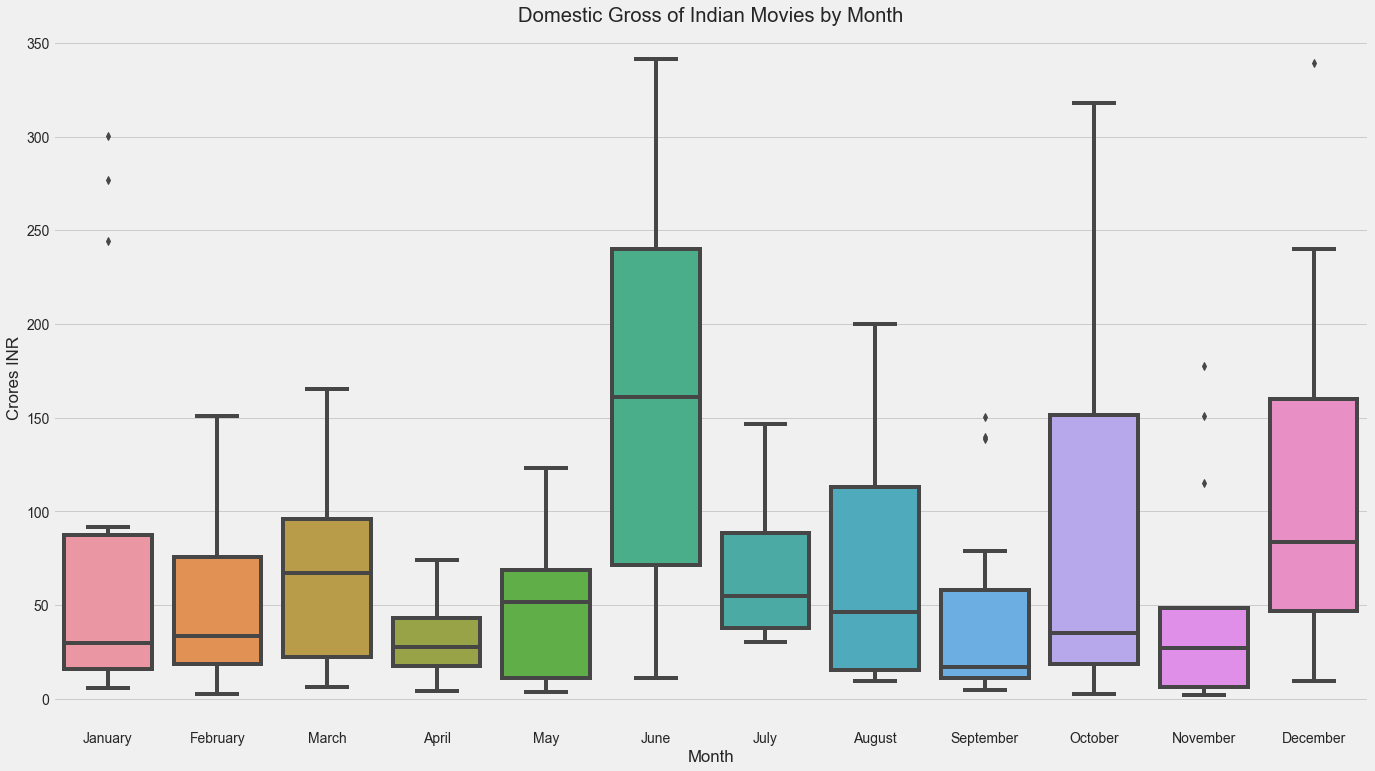

In [11]:
months = ["January", "February", "March", "April", "May", "June", "July",
          "August", "September", "October", "November", "December"]
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (21, 12))
sns.boxplot(x = "Month", y = "domestic", data = movies, order = months)
plt.ylabel("Crores INR")
plt.xlabel("Month")
plt.title("Domestic Gross of Indian Movies by Month")

Text(0.5, 1.0, 'Worldwide Gross of Indian Movies by Month')

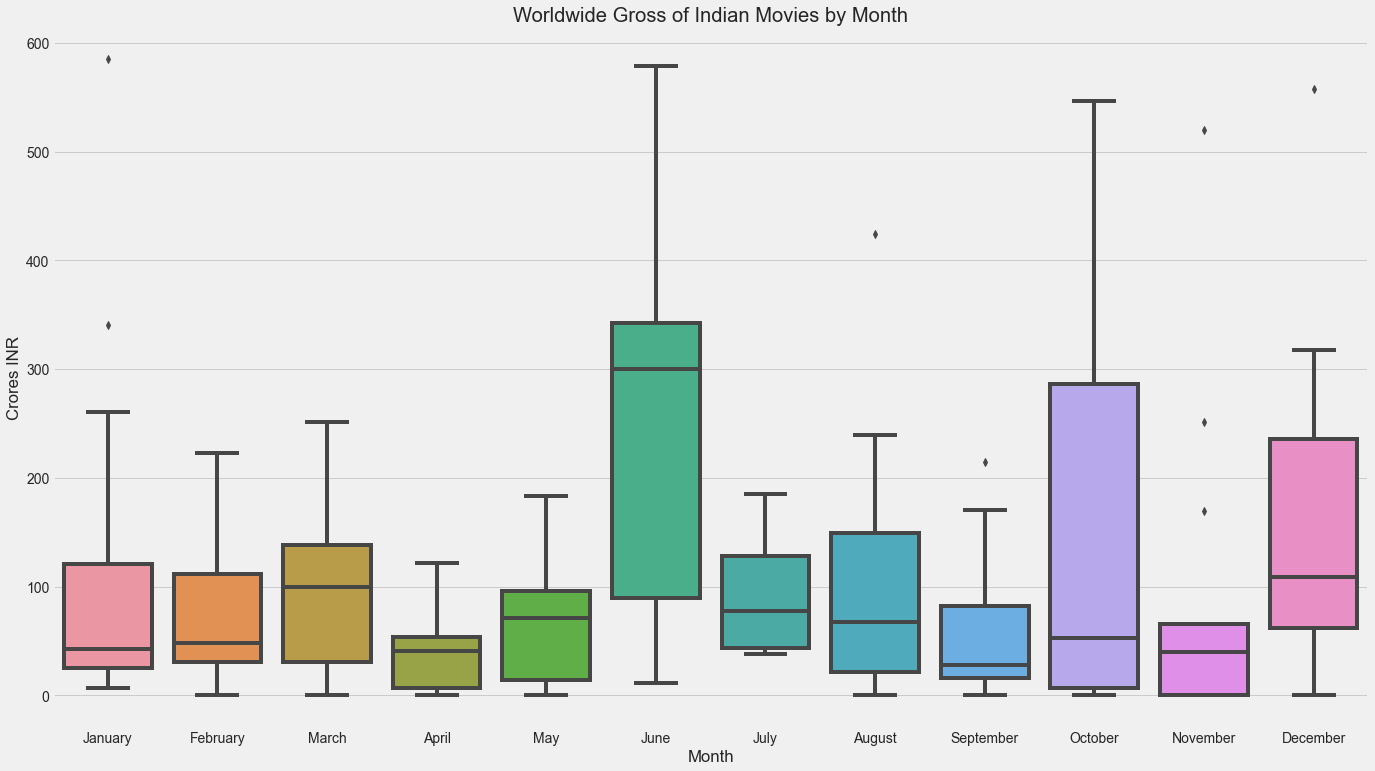

In [12]:
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
plt.figure(figsize = (21, 12))
sns.boxplot(x = "Month", y = "worldwide", data = movies, order = months)
plt.ylabel("Crores INR")
plt.xlabel("Month")
plt.title("Worldwide Gross of Indian Movies by Month")

June seems to be the biggest month for movies in both Domestic and Worldwide markets. December also appears to be a decent month for movies at the theaters. Every other month had median values under 100cr intakes at the box office. June and December movies get good bumps from the worldwide box office. September is possibly the worst performing month though April and November aren't great either.


In [13]:
hundred = movies[movies["worldwide"] >= 100]
hundred.shape

(48, 17)

(0.0, 25.0)

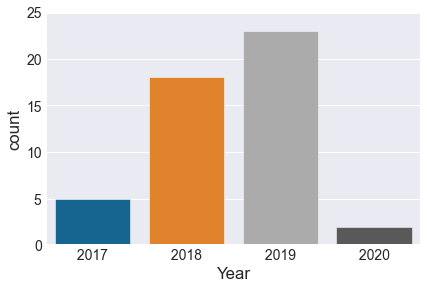

In [14]:
sns.set_style("darkgrid")
plt.style.use("tableau-colorblind10")
sns.countplot(x = "Year", data = hundred)
plt.ylim(0, 25)

There was a considerable jump in 100cr movies form 2017 to 2018. There was an overall increasing trend in 100cr movies from 2017 to 2019. 2020 data is to hard to read from; it is low but it's not halfway through the year yet and Covid-19 is certainly going to cripple numbers.

Text(0.5, 0, 'Runtime of Movie')

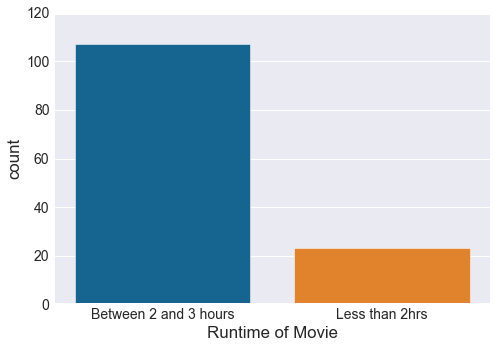

In [15]:
plt.figure(figsize = (7, 5))
sns.set_style("darkgrid")
plt.style.use("tableau-colorblind10")
sns.countplot(x = "cat_runtime", data = movies)
plt.ylim(0, 120)
plt.xlabel("Runtime of Movie")

There aren't a lot of movies that are shorter than 2hrs but there aren't any that are longer than 3hrs which is quite surprising.

Now that I've taken a look at some of the group statistics, I'm going to take a look at some of the individual statistics. Biggest opening day and biggest opening weekend seem like a good place to start.

In [16]:
opening_weekend = movies.sort_values(by = ["weekend"], ascending = False).head(10)
first_day = movies.sort_values(by = ["opening"], ascending = False).head(10)

Text(0.5, 1.0, 'Biggest Opening Weekend')

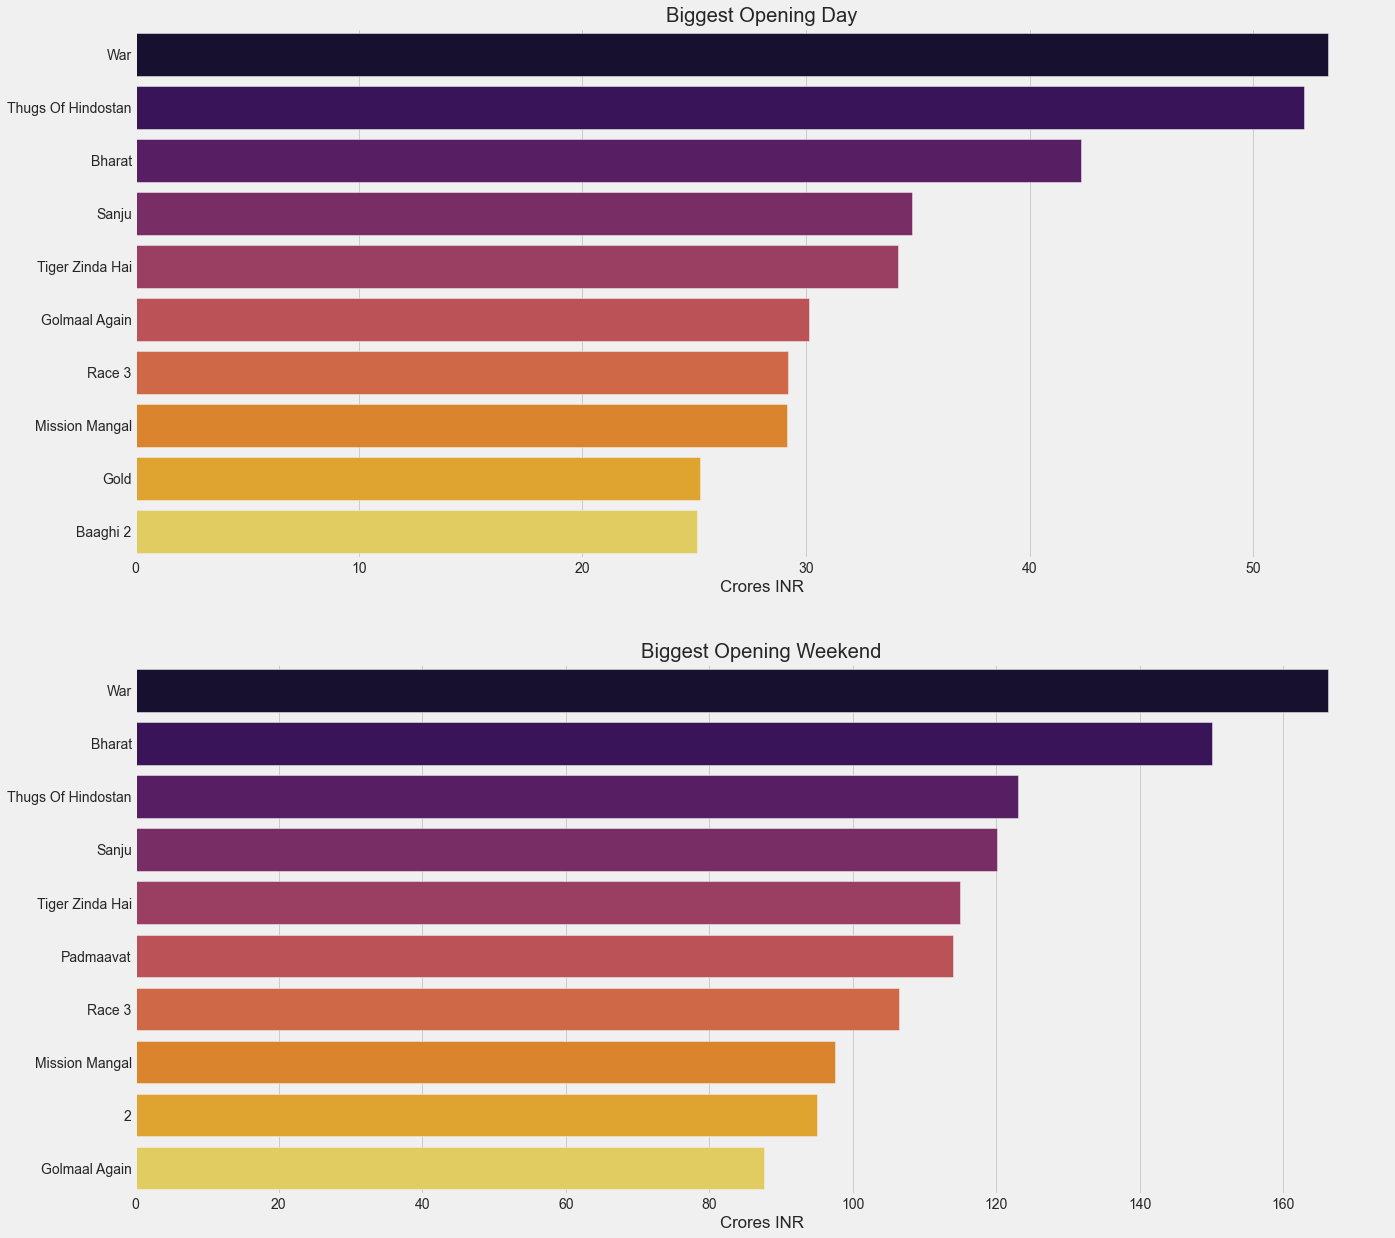

In [17]:
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
f, ax = plt.subplots(2, 1, figsize = (20, 20), squeeze = False)

sns.barplot(x = 'opening', y = 'name', data = first_day, ax = ax[0][0], palette = "inferno")
sns.barplot(x = 'weekend', y = 'name', data = opening_weekend, ax = ax[1][0], palette = 'inferno')

ax[0][0].set_ylabel('')
ax[0][0].set_xlabel('Crores INR')
ax[0][0].set_title('Biggest Opening Day')

ax[1][0].set_ylabel('')
ax[1][0].set_xlabel('Crores INR')
ax[1][0].set_title('Biggest Opening Weekend')

Aside from Thugs of Hindustan and Bharat switching spots, the top 5 stay the same from opening day through the weekend. Padmaavat came from a 25cr or less opening day and turned into a 110+ cr opening weekend.
